# MBA em Big Data - Ibmec
####  Disciplina: Análise de Séries Temporais
####  Prof: Sérgio Assunção Monteiro, DSc
####  Aluna: Ana Gabriela da Silva Teixeira

##Atividade Dissertativa - Análise da série temporal de Bitcoin (BTC-USD)

**Instalando e importando as bibliotecas necessárias**

In [ ]:
!!pip install yfinance --upgrade --no-cache-dir

In [5]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 9.9 MB 43.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [70]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pylab as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import seaborn as sns
from sklearn.model_selection import train_test_split

### Exercício 01: Obter os dados financeiros sobre a criptomoeda BITCOIN ("BTC-USD") do período de dezembro de 2021 a janeiro de 2022". (0,20 ponto)

**Carregando a série de Bitcoin (BTC-USD) de Dezembro de 2021 a Janeiro de 2022**

In [48]:
dados = yf.download("BTC-USD", start="2021-12-01", end="2022-01-31")

[*********************100%***********************]  1 of 1 completed


**Visualizando os dados**

In [49]:
with pd.option_context('display.max_rows',10):
  print(dados)

                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   
...                  ...           ...           ...           ...   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

               Adj Close       Volume  
Date                                   
2021-12-0

In [50]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,45643.815766,46510.139280,44263.628138,45298.745133,45298.745133,3.049658e+10
std,5254.283022,5357.062301,5155.413041,5120.290174,5120.290174,1.076170e+10
min,35047.359375,36433.312500,33184.058594,35030.250000,35030.250000,1.464355e+10
25%,42250.074219,43001.156250,41338.160156,41911.601562,41911.601562,2.436791e+10
50%,46707.062500,47827.312500,45752.464844,46458.117188,46458.117188,2.822388e+10
75%,49201.519531,50205.000000,47358.351562,48936.613281,48936.613281,3.367681e+10
max,57217.371094,59041.683594,56553.082031,57229.828125,57229.828125,8.419661e+10


**Selecionando apenas os dados de fechamento**

In [88]:
df = dados.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

**Visualização gráfica dos dados**

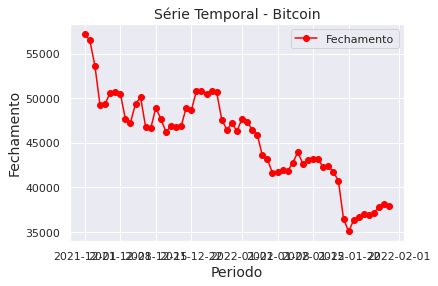

In [122]:
#Utilizando o matplotlib
plt.plot(dados.index, 
         df['Close'], 
         color='red', 
         marker='o')

plt.title('Série Temporal - Bitcoin', fontsize=14)
plt.xlabel('Periodo', fontsize=14)
plt.ylabel('Fechamento', fontsize=14)
plt.legend(labels=['Fechamento'],loc='best')
plt.grid(True)
plt.show()

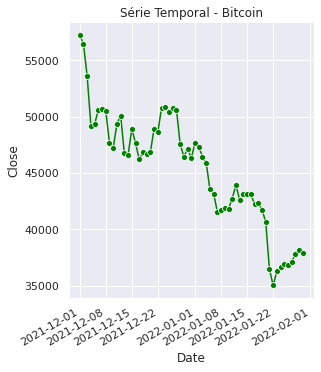

In [118]:
#Utilizando o seaborn
g = sns.relplot(x=df.index, 
                y=df.Close, 
                kind="line", 
                data=df,
                color='green', 
                marker='o').set(title='Série Temporal - Bitcoin')

g.figure.autofmt_xdate()

**Visualizando a distribuição**

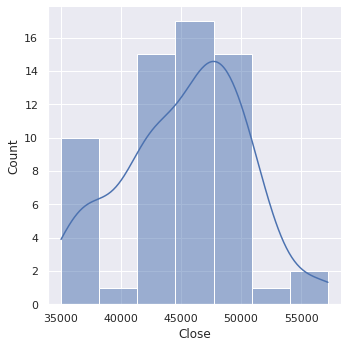

In [89]:
sns.set_theme(style="darkgrid")

sns.displot(df['Close'].dropna(), kde=True)

### Exercício 02: Fazer as decomposições aditiva e multiplicativa da série. (0,30 ponto)

**Decomposição modelo aditivo**

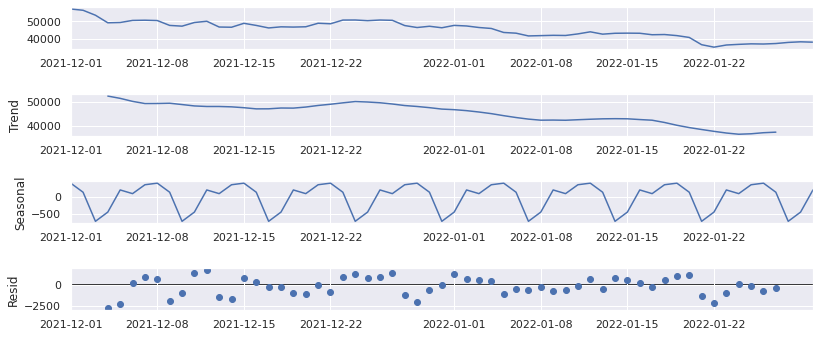

In [103]:
result = seasonal_decompose(df, model='additive')  
fig = result.plot()
fig.set_size_inches((13, 5))
fig.show()

**Decomposição modelo multiplicativo**

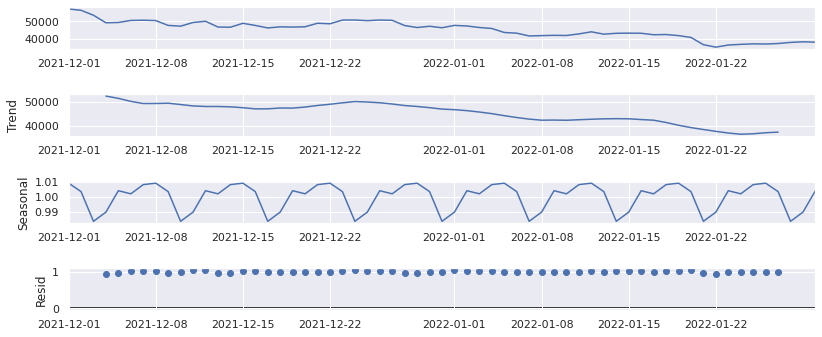

In [104]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()
fig.set_size_inches((13, 5))
fig.show()

### Exercício 03: Aplicar o modelo de médias móveis (suavização) para estudar o comportamento da série no período informado. Imprimir os gráfico: real x suavização. (0,50 ponto)

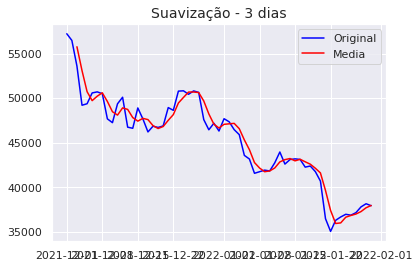

In [123]:
#Janela de 3 dias
mm = pd.DataFrame.rolling(df,window=3,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Media')
plt.legend(loc='best')
plt.title('Suavização - 3 dias', fontsize=14)
plt.show()

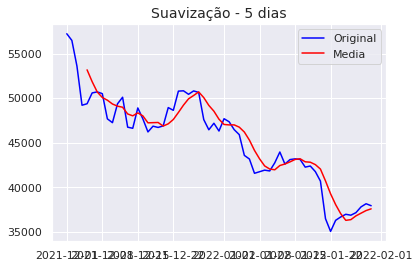

In [124]:
#Janela de 5 dias
mm = pd.DataFrame.rolling(df,window=5,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Media')
plt.legend(loc='best')
plt.title('Suavização - 5 dias', fontsize=14)
plt.show()

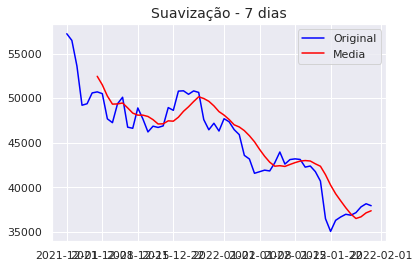

In [125]:
#Janela de 7 dias
mm = pd.DataFrame.rolling(df,window=7,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Media')
plt.legend(loc='best')
plt.title('Suavização - 7 dias', fontsize=14)
plt.show()

### Exercício 04: Aplicar ARIMA para tentar capturar o comportamento da série. Divida a série em 70% dos dados para treinamento e 30% para teste. Faça um gráfico: Real x Estimado. (0,50 ponto)

In [60]:
stepwise_fit = auto_arima(df['Close'], 
                          trace=True,
                          suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1037.300, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1044.315, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1046.419, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1048.310, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1045.372, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1042.587, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1039.315, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1037.350, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1037.578, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1046.108, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1038.486, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1037.432, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1038.653, Time=0.22 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [75]:
dados_treinamento, dados_teste = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
dados_treinamento = dados_treinamento['Close'].values
dados_teste = dados_teste['Close'].values
historico = [x for x in dados_treinamento]
modelo_preditivo = []

In [76]:
N_observacoes_teste = len(dados_teste)
for ponto_de_teste in range(N_observacoes_teste):
  modelo = ARIMA(historico, order=(2,1,2))  
  modelo_fit = modelo.fit()
  saida = modelo_fit.forecast()
  yhat = saida[0]
  modelo_preditivo.append(yhat)
  valor_real_teste = dados_teste[ponto_de_teste]
  historico.append(valor_real_teste)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


In [77]:
modelo_preditivo

[42718.94819719756,
 43910.005088674894,
 42467.395315622794,
 43172.93506350027,
 43264.01508704941,
 43105.45050348411,
 42182.521288339405,
 42416.317200918034,
 41797.77136674368,
 40725.85332972428,
 36468.52057587233,
 35282.91981503371,
 36561.26375862525,
 36520.24087198343,
 36656.264550107466,
 36755.774931162945,
 37308.33977425801,
 37932.98597208245,
 38052.81181411211]

In [78]:
erroMSE = mean_squared_error(dados_teste, modelo_preditivo)
print('O Erro Médio Quadrado (MSE) é {}'.format(erroMSE))

O Erro Médio Quadrado (MSE) é 1478281.4856606845


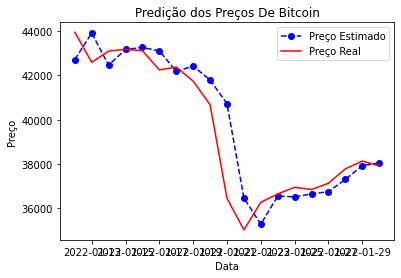

In [79]:
intervalo_dos_dados_de_teste = df[int(len(df)*0.7):].index
plt.plot(intervalo_dos_dados_de_teste, 
         modelo_preditivo, 
         color='blue', 
         marker='o', 
         linestyle='dashed',
         label='Preço Estimado')

plt.plot(intervalo_dos_dados_de_teste, 
         dados_teste, 
         color='red', 
         label='Preço Real')

plt.title('Predição dos Preços De Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

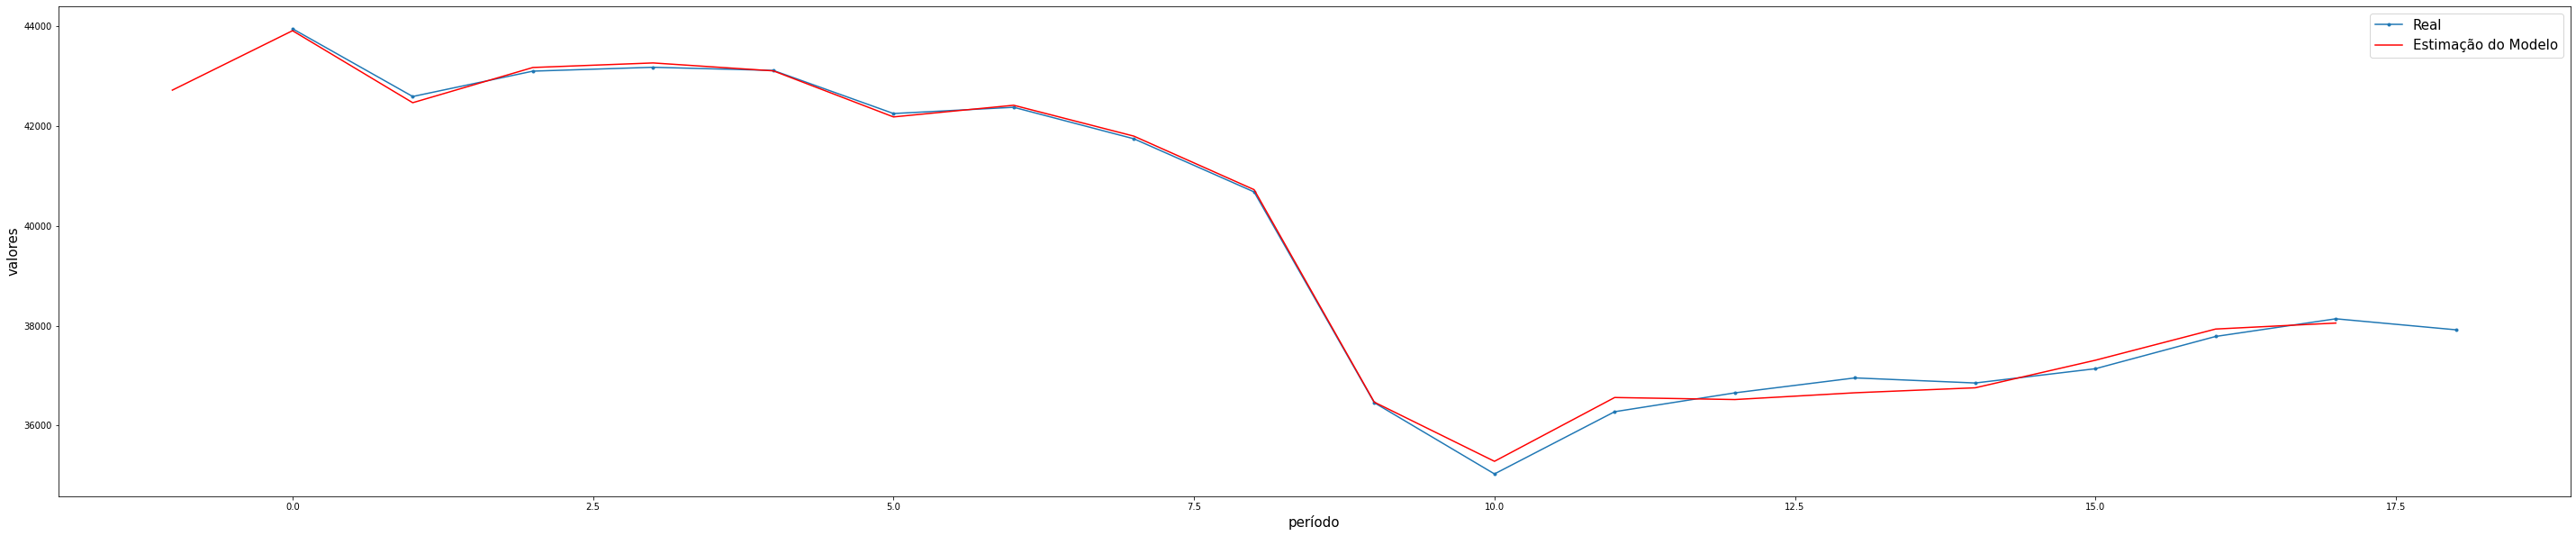

In [80]:
look_back = 1
plt.figure(figsize=(50,10))
plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))), 
         dados_teste, 
         marker='.', 
         label="Real")

plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))-look_back), 
         modelo_preditivo, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()